In [1]:
import os
from importlib import reload

import pandas as pd

In [2]:
from analysis.timescales import compute_taus_growing
reload(compute_taus_growing)

<module 'analysis.timescales.compute_taus_growing' from '/raven/u/mhami/rnn_timescale_public/analysis/timescales/compute_taus_growing.py'>

In [3]:
slurm_path = os.path.abspath("./trained_models/SLURM_ARRAY_JOB_ID=7669330_Mar-05-2024-13_14_48")
paths = compute_taus_growing.resolve_paths(slurm_path)


100%|██████████| 2500/2500 [00:01<00:00, 1996.64it/s]


In [4]:
list(paths.keys())[:5]

['1732_grow_parity__2024-Mar-06-13_21_13',
 '643_grow_parity__2024-Mar-05-13_20_19',
 '2286_grow_parity__2024-Mar-06-13_27_42',
 '1156_grow_parity__2024-Mar-05-13_26_11',
 '1587_grow_parity__2024-Mar-06-13_21_01']

In [5]:
print(paths['643_grow_parity__2024-Mar-05-13_20_19'])

['rnn_1_N5', 'rnn_1_N2', 'configs.json', 'rnn_1_N16', 'rnn_1_N22', 'stats.npy', 'rnn_1_N20', 'rnn_1_N6', 'rnn_1_N3', 'rnn_1_N15', 'rnn_1_N17', 'rnn_1_N8', 'rnn_0_init', 'rnn_1_N21', 'rnn_1_N11', 'rnn_1_N23', 'rnn_1_N12', 'rnn_1_N18', 'rnn_1_N19', 'rnn_1_N24', 'rnn_1_N7', 'rnn_1_N4', 'rnn_1_N9', 'rnn_1_N14', 'rnn_1_N13', 'rnn_1_N10']


In [6]:
configs, stats, missing = compute_taus_growing.get_all_configs_and_stats(slurm_directory=slurm_path)

100%|██████████| 2500/2500 [00:41<00:00, 60.84it/s]


In [7]:
len(stats)

2500

In [8]:
# print(stats[10]['accuracy'])

In [9]:
for stat in stats:
    stat['len_accuracies'] = list(map(lambda x: len(x), stat['accuracy']))

In [10]:
configs_df = pd.DataFrame(configs)
stats_df = pd.DataFrame(stats)

In [11]:
stats_df

,loss,accuracy,time,epochs,max_N,subdir,len_accuracies
0,"[0.2298252384737134, 0.15111040333285927, 0.08...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[178.74608945846558, 456.16991353034973, 849.0...",11,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",1732_grow_parity__2024-Mar-06-13_21_13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
1,"[0.13188420415855945, 0.1876632080078125, 0.15...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[174.9330472946167, 415.98202109336853, 815.61...",30,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",643_grow_parity__2024-Mar-05-13_20_19,"[1, 2, 3, 4, 5, 6, 7, 7, 7, 7, 7, 8, 9, 10, 10..."
2,"[0.11845130173675716, 0.12294781027315184, 0.0...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[236.57075262069702, 634.0897543430328, 1294.2...",9,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",2286_grow_parity__2024-Mar-06-13_27_42,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
3,"[0.2883076078891754, 0.2760491908416152, 0.199...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[193.2250006198883, 473.14977407455444, 870.82...",23,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1156_grow_parity__2024-Mar-05-13_26_11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,"[0.2299255981706083, 0.3302489474788308, 0.390...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[217.40252208709717, 523.8867738246918, 926.22...",25,"[2, 3, 4, 5, 6, 7]",1587_grow_parity__2024-Mar-06-13_21_01,"[1, 2, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, ..."
...,...,...,...,...,...,...,...
2495,"[0.41928262965381147, 0.5191053489744664, 0.06...","[[tensor(100.)], [tensor(100.), tensor(97.7734...","[267.4635064601898, 701.1141936779022, 1164.90...",25,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",812_grow_parity__2024-Mar-05-13_26_16,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 7, 8, 9, 10, 11, 1..."
2496,"[0.08575461654295213, 0.10532638053502888, 0.1...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[163.8066382408142, 415.43637466430664, 892.72...",10,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",2488_grow_parity__2024-Mar-06-13_30_12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]"
2497,"[0.3002911292910576, 0.3714220146127045, 0.233...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[192.1581654548645, 496.263623714447, 1132.381...",22,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",280_grow_parity__2024-Mar-05-13_16_27,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2498,"[0.26206608490645883, 0.20413581527024507, 0.1...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[131.48947191238403, 352.8107109069824, 705.26...",22,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",150_grow_parity__2024-Mar-05-13_16_28,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [12]:
configs_df['subdir']

0       1732_grow_parity__2024-Mar-06-13_21_13
1        643_grow_parity__2024-Mar-05-13_20_19
2       2286_grow_parity__2024-Mar-06-13_27_42
3       1156_grow_parity__2024-Mar-05-13_26_11
4       1587_grow_parity__2024-Mar-06-13_21_01
                         ...                  
2495     812_grow_parity__2024-Mar-05-13_26_16
2496    2488_grow_parity__2024-Mar-06-13_30_12
2497     280_grow_parity__2024-Mar-05-13_16_27
2498     150_grow_parity__2024-Mar-05-13_16_28
2499    1416_grow_parity__2024-Mar-06-13_19_54
Name: subdir, Length: 2500, dtype: object

In [13]:
stats_df

,loss,accuracy,time,epochs,max_N,subdir,len_accuracies
0,"[0.2298252384737134, 0.15111040333285927, 0.08...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[178.74608945846558, 456.16991353034973, 849.0...",11,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",1732_grow_parity__2024-Mar-06-13_21_13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
1,"[0.13188420415855945, 0.1876632080078125, 0.15...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[174.9330472946167, 415.98202109336853, 815.61...",30,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",643_grow_parity__2024-Mar-05-13_20_19,"[1, 2, 3, 4, 5, 6, 7, 7, 7, 7, 7, 8, 9, 10, 10..."
2,"[0.11845130173675716, 0.12294781027315184, 0.0...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[236.57075262069702, 634.0897543430328, 1294.2...",9,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",2286_grow_parity__2024-Mar-06-13_27_42,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
3,"[0.2883076078891754, 0.2760491908416152, 0.199...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[193.2250006198883, 473.14977407455444, 870.82...",23,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1156_grow_parity__2024-Mar-05-13_26_11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,"[0.2299255981706083, 0.3302489474788308, 0.390...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[217.40252208709717, 523.8867738246918, 926.22...",25,"[2, 3, 4, 5, 6, 7]",1587_grow_parity__2024-Mar-06-13_21_01,"[1, 2, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, ..."
...,...,...,...,...,...,...,...
2495,"[0.41928262965381147, 0.5191053489744664, 0.06...","[[tensor(100.)], [tensor(100.), tensor(97.7734...","[267.4635064601898, 701.1141936779022, 1164.90...",25,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",812_grow_parity__2024-Mar-05-13_26_16,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 7, 8, 9, 10, 11, 1..."
2496,"[0.08575461654295213, 0.10532638053502888, 0.1...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[163.8066382408142, 415.43637466430664, 892.72...",10,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",2488_grow_parity__2024-Mar-06-13_30_12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]"
2497,"[0.3002911292910576, 0.3714220146127045, 0.233...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[192.1581654548645, 496.263623714447, 1132.381...",22,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",280_grow_parity__2024-Mar-05-13_16_27,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2498,"[0.26206608490645883, 0.20413581527024507, 0.1...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[131.48947191238403, 352.8107109069824, 705.26...",22,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",150_grow_parity__2024-Mar-05-13_16_28,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


Text(0, 0.5, 'Largest $N_{\\text{parity}}$')

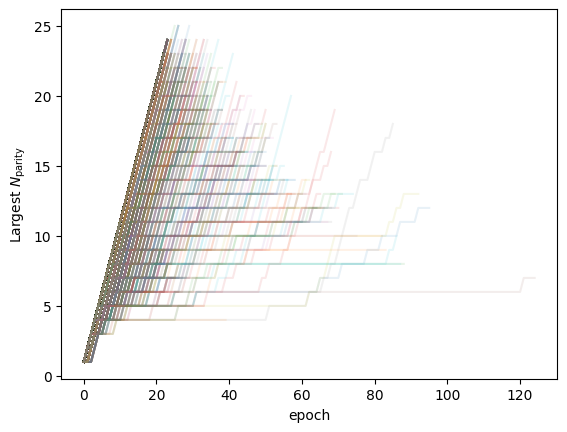

In [14]:
import matplotlib.pyplot as plt
for stat in stats:
    plt.plot(stat['len_accuracies'], alpha=0.1)

plt.xlabel('epoch')
plt.ylabel('Largest $N_{\\text{parity}}$')

Text(0, 0.5, 'Largest $N_{\\text{parity}}$')

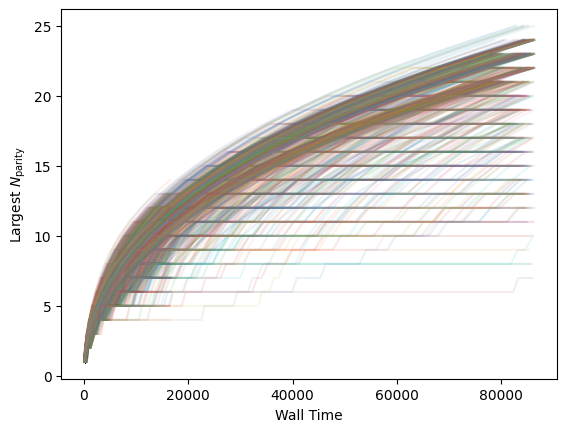

In [15]:
import matplotlib.pyplot as plt
for stat in stats:
    plt.plot(stat['time'], stat['len_accuracies'], alpha=0.1)

plt.xlabel('Wall Time')
plt.ylabel('Largest $N_{\\text{parity}}$')

In [16]:
# list(map(lambda x: x.tolist(), stat['accuracy']))

In [17]:
len(stats)

2500

In [18]:
configs_df.subdir

0       1732_grow_parity__2024-Mar-06-13_21_13
1        643_grow_parity__2024-Mar-05-13_20_19
2       2286_grow_parity__2024-Mar-06-13_27_42
3       1156_grow_parity__2024-Mar-05-13_26_11
4       1587_grow_parity__2024-Mar-06-13_21_01
                         ...                  
2495     812_grow_parity__2024-Mar-05-13_26_16
2496    2488_grow_parity__2024-Mar-06-13_30_12
2497     280_grow_parity__2024-Mar-05-13_16_27
2498     150_grow_parity__2024-Mar-05-13_16_28
2499    1416_grow_parity__2024-Mar-06-13_19_54
Name: subdir, Length: 2500, dtype: object

In [19]:
configs_df[configs_df.subdir.str.startswith('994')].iloc[0]

SEED                                                             0
NUM_EPOCHS                                                     200
BATCH_SIZE                                                     256
TRAINING_STEPS                                                 500
REPLICAS                                                         2
TEST_STEPS                                                      50
DEVICE                                                         cpu
CURRICULUM                                                    grow
LEARNING_RATE                                                  0.4
MOMENTUM                                                       0.3
FREEZING_STEPS                                                   1
GAMMA                                                          0.2
WEIGHT_NOISE                                                   0.1
BIAS_NOISE                                                    0.03
TAUS_NOISE                                                    

In [20]:
configs_df

,SEED,NUM_EPOCHS,BATCH_SIZE,TRAINING_STEPS,REPLICAS,TEST_STEPS,DEVICE,CURRICULUM,LEARNING_RATE,MOMENTUM,...,NET_SIZE,NUM_CLASSES,BIAS,NUM_READOUT_HEADS_PER_MOD,TRAIN_TAU,TASK,COMMIT_HASH,FILES_MODIFIED,BIAS_NIOSE,subdir
0,0,200,256,500,2,50,cpu,grow,0.4,0.1,...,10.0,2,True,1,True,parity,None,None,0.01,1732_grow_parity__2024-Mar-06-13_21_13
1,0,200,256,500,2,50,cpu,grow,0.3,0.1,...,5.0,2,True,1,True,parity,None,None,0.20,643_grow_parity__2024-Mar-05-13_20_19
2,0,200,256,500,2,50,cpu,grow,0.4,0.3,...,30.0,2,True,1,True,parity,None,None,0.10,2286_grow_parity__2024-Mar-06-13_27_42
3,0,200,256,500,2,50,cpu,grow,0.3,0.1,...,10.0,2,True,1,True,parity,None,None,0.01,1156_grow_parity__2024-Mar-05-13_26_11
4,0,200,256,500,2,50,cpu,grow,0.1,0.4,...,5.0,2,True,1,True,parity,None,None,0.20,1587_grow_parity__2024-Mar-06-13_21_01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,200,256,500,2,50,cpu,grow,0.1,0.3,...,30.0,2,True,1,True,parity,None,None,0.01,812_grow_parity__2024-Mar-05-13_26_16
2496,0,200,256,500,2,50,cpu,grow,0.3,0.4,...,15.0,2,True,1,True,parity,None,None,0.01,2488_grow_parity__2024-Mar-06-13_30_12
2497,0,200,256,500,2,50,cpu,grow,0.1,0.2,...,15.0,2,True,1,True,parity,None,None,0.01,280_grow_parity__2024-Mar-05-13_16_27
2498,0,200,256,500,2,50,cpu,grow,0.3,0.2,...,10.0,2,True,1,True,parity,None,None,0.10,150_grow_parity__2024-Mar-05-13_16_28


In [21]:
if 'BIAS_NIOSE' in configs_df.columns:
    configs_df['BIAS_NOISE'] = configs_df['BIAS_NIOSE']

In [22]:
df = pd.merge(configs_df, stats_df, on='subdir')

In [23]:
df.head()

,SEED,NUM_EPOCHS,BATCH_SIZE,TRAINING_STEPS,REPLICAS,TEST_STEPS,DEVICE,CURRICULUM,LEARNING_RATE,MOMENTUM,...,COMMIT_HASH,FILES_MODIFIED,BIAS_NIOSE,subdir,loss,accuracy,time,epochs,max_N,len_accuracies
0,0,200,256,500,2,50,cpu,grow,0.4,0.1,...,None,None,0.01,1732_grow_parity__2024-Mar-06-13_21_13,"[0.2298252384737134, 0.15111040333285927, 0.08...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[178.74608945846558, 456.16991353034973, 849.0...",11,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
1,0,200,256,500,2,50,cpu,grow,0.3,0.1,...,None,None,0.20,643_grow_parity__2024-Mar-05-13_20_19,"[0.13188420415855945, 0.1876632080078125, 0.15...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[174.9330472946167, 415.98202109336853, 815.61...",30,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[1, 2, 3, 4, 5, 6, 7, 7, 7, 7, 7, 8, 9, 10, 10..."
2,0,200,256,500,2,50,cpu,grow,0.4,0.3,...,None,None,0.10,2286_grow_parity__2024-Mar-06-13_27_42,"[0.11845130173675716, 0.12294781027315184, 0.0...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[236.57075262069702, 634.0897543430328, 1294.2...",9,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
3,0,200,256,500,2,50,cpu,grow,0.3,0.1,...,None,None,0.01,1156_grow_parity__2024-Mar-05-13_26_11,"[0.2883076078891754, 0.2760491908416152, 0.199...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[193.2250006198883, 473.14977407455444, 870.82...",23,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,0,200,256,500,2,50,cpu,grow,0.1,0.4,...,None,None,0.20,1587_grow_parity__2024-Mar-06-13_21_01,"[0.2299255981706083, 0.3302489474788308, 0.390...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[217.40252208709717, 523.8867738246918, 926.22...",25,"[2, 3, 4, 5, 6, 7]","[1, 2, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, ..."


In [24]:
for c in configs_df.columns:
    if len(configs_df[c].unique()) > 1:
        print(c, configs_df[c].unique(), '\n')

LEARNING_RATE [0.4 0.3 0.1 0.2] 

MOMENTUM [0.1 0.3 0.4 0.2] 

GAMMA [0.7  0.4  0.2  0.1  0.95] 

WEIGHT_NOISE [0.01 0.2  0.1  0.05] 

BIAS_NOISE [0.01 0.2  0.1  0.05] 

TAUS_NOISE [0.01 0.2  0.1  0.05] 

NET_SIZE [10.  5. 30. 15.] 

BIAS_NIOSE [0.01 0.2  0.1  0.05] 

subdir ['1732_grow_parity__2024-Mar-06-13_21_13'
 '643_grow_parity__2024-Mar-05-13_20_19'
 '2286_grow_parity__2024-Mar-06-13_27_42' ...
 '280_grow_parity__2024-Mar-05-13_16_27'
 '150_grow_parity__2024-Mar-05-13_16_28'
 '1416_grow_parity__2024-Mar-06-13_19_54'] 



In [25]:
df['epoch_index'] = df.epochs.apply(lambda x: list(range(x + 1)))
df.sort_values(['LEARNING_RATE', 'MOMENTUM', 'GAMMA', 'WEIGHT_NOISE', 'NET_SIZE'], inplace=True)

In [26]:
df.epoch_index

110     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
1349    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
1401    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
1644    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
613        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
                              ...                        
2462               [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
816                    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
1917    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
1475                       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2227    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Name: epoch_index, Length: 2500, dtype: object

In [30]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive, Dropdown, VBox, HBox
from matplotlib.lines import Line2D
import numpy as np

# # Create example DataFrame
# df = pd.DataFrame({
#     'ID': [1, 2, 3, 4, 5],
#     'Category': ['A', 'B', 'A', 'C', 'B'],
#     'Subcategory': ['X', 'Y', 'X', 'Z', 'Y'],
#     'Values': [np.random.rand(5).tolist() for _ in range(5)]
# })

# Function to create dropdown widgets for specified columns
def create_dropdowns(columns):
    dropdowns = {}
    for col in columns:
        dropdown = Dropdown(options=['All'] + sorted(df[col].unique()), description=col+':')
        dropdowns[col] = dropdown
    return dropdowns

# Function to plot data based on dropdown selections
def plot_data(**kwargs):
    x_col = kwargs.pop('x_col')
    # y_col = kwargs.pop(y_col)
    color_by = kwargs.pop('Color Lines By')
    filtered_df = df.copy()
    filters = []
    for col, value in kwargs.items():
        if value != 'All':
            filtered_df = filtered_df[filtered_df[col] == value]
            filters.append(f'{col}={value}')
    
    print("Number of items left: ", len(filtered_df))
    if not filtered_df.empty:
        fig, ax = plt.subplots(figsize=(10, 6))
        plotted_with_labels = False
        if color_by == 'None':
            # Plot without differentiating colors
            for _, row in filtered_df.iterrows():
                ax.plot(row[x_col], row['len_accuracies'] , marker='o', linestyle='-')
        else:
            unique_values = sorted(filtered_df[color_by].unique())
            norm = plt.Normalize(0, len(unique_values)-1)
            scalar_map = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
            colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))
            plots = []
            for value, color in zip(unique_values, colors):
                for j, row in filtered_df[filtered_df[color_by] == value].iterrows():
                    color_value = f'{value}' if j == 0 else '_nolegend_'
                    # print(value, color_value)
                    ax.plot(row[x_col], row['len_accuracies'], marker='o', linestyle='-', color=color, label=color_value, alpha=0.3)
                    # plots.append(p)
                    plotted_with_labels = True
        if plotted_with_labels:
            legend_elements = [Line2D([0], [0], color=scalar_map.to_rgba(i), lw=2, label=category) for i, category in enumerate(unique_values)]
            ax.legend(title=color_by, handles=legend_elements)
        ax.set_title(f'Filters: ' + ';'.join(filters))
        
        ax.set_xlabel(x_col)
        ax.set_ylabel('Values')
        ax.grid(True)
        x_max = max(df[x_col].apply(max))
        y_max = max(df['len_accuracies'].apply(max))
        plt.xlim([0, x_max])
        plt.ylim([0, y_max + 1])
        fig.show()
            # print(plots)

        
# Columns to use for selectors
selector_columns = ['MOMENTUM', 'LEARNING_RATE', 'DUPLICATE_TAUS', 'WEIGHT_NOISE', 'GAMMA', 'NET_SIZE']
color_by_columns = ['MOMENTUM', 'LEARNING_RATE', 'DUPLICATE_TAUS', 'WEIGHT_NOISE', 'GAMMA', 'NET_SIZE']

x_cols = ['epoch_index', 'time']
y_cols = ['len_accuracies']

# Create dropdown widgets
dropdowns = {col: Dropdown(options=['All'] + sorted(df[col].unique()), description=col+':') for col in selector_columns}

color_by_dropdown = Dropdown(options=['None'] + color_by_columns, description='Color Lines By:')

x_cols = Dropdown(options=x_cols, description='x_col')

all_widgets = {**dropdowns, **{'Color Lines By': color_by_dropdown}, **{'x_col': x_cols}}
# Create interactive widget
interactive_plot = interactive(plot_data, **all_widgets)

# Display widgets and interactive plot
# display(VBox([HBox([v for v in dropdowns.values()]), color_by_dropdown]), interactive_plot)
display(interactive_plot)


interactive(children=(Dropdown(description='MOMENTUM:', options=('All', 0.1, 0.2, 0.3, 0.4), value='All'), Dro…

In [31]:
paths['1732_grow_parity__2024-Mar-06-13_21_13']

['rnn_1_N5',
 'rnn_1_N2',
 'configs.json',
 'stats.npy',
 'rnn_1_N6',
 'rnn_1_N3',
 'rnn_1_N8',
 'rnn_0_init',
 'rnn_1_N11',
 'rnn_1_N12',
 'rnn_1_N7',
 'rnn_1_N4',
 'rnn_1_N9',
 'rnn_1_N13',
 'rnn_1_N10']

In [33]:
# import re

# pattern = r'N(\d*)'
# match = re.search(pattern, 'alskdfj_1_iN234')
# match.group(1).isdigit()

# match = re.search(pattern, 'alskdfj_1_iNinit')
# match.group(1).isdigit()



# match = re.search(pattern, 'alskdf')
# match
# print(match)

In [34]:
import re

max_vals = {}
pattern = r'N(\d*)'
for k, l in paths.items():
    # print(l)
    g = [re.search(pattern, v) for v in l]
    max_val = max([int(gg.group(1)) for gg in g if gg is not None])
    max_vals[k] = max_val

(array([  8.,  34., 148., 775., 336.,  69.,  74.,  98., 403., 555.]),
 array([ 4. ,  6.2,  8.4, 10.6, 12.8, 15. , 17.2, 19.4, 21.6, 23.8, 26. ]),
 <BarContainer object of 10 artists>)

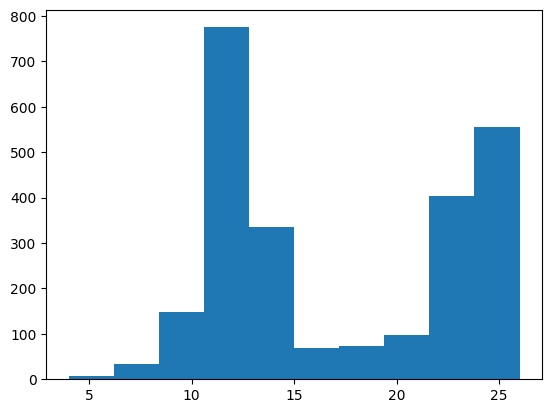

In [35]:
plt.hist(max_vals.values())

In [36]:
paths_sorted = sorted(max_vals.items(), key=lambda x: x[1], reverse=True)

In [37]:
paths_sorted[0]

('481_grow_parity__2024-Mar-05-13_18_33', 26)

In [38]:
paths['481_grow_parity__2024-Mar-05-13_18_33']

['rnn_1_N5',
 'rnn_1_N2',
 'configs.json',
 'rnn_1_N16',
 'rnn_1_N26',
 'rnn_1_N22',
 'stats.npy',
 'rnn_1_N20',
 'rnn_1_N6',
 'rnn_1_N3',
 'rnn_1_N15',
 'rnn_1_N25',
 'rnn_1_N17',
 'rnn_1_N8',
 'rnn_0_init',
 'rnn_1_N21',
 'rnn_1_N11',
 'rnn_1_N23',
 'rnn_1_N12',
 'rnn_1_N18',
 'rnn_1_N19',
 'rnn_1_N24',
 'rnn_1_N7',
 'rnn_1_N4',
 'rnn_1_N9',
 'rnn_1_N14',
 'rnn_1_N13',
 'rnn_1_N10']

In [39]:
reload(compute_taus_growing)
from src.models import RNN_hier
reload(RNN_hier)
full_path = './trained_models/SLURM_ARRAY_JOB_ID=7669330_Mar-05-2024-13_14_48/481_grow_parity__2024-Mar-05-13_18_33/rnn_1_N26'
rnn, configs = compute_taus_growing.load_and_hydrate_hierarchical_model(full_path)

In [40]:
rnn


RNN_Hierarchical(
  (afunc): LeakyReLU(negative_slope=0.01)
  (parameter_dict): ParameterDict(
      (0): Parameter containing: [torch.FloatTensor of size 5]
      (1): Parameter containing: [torch.FloatTensor of size 5]
      (10): Parameter containing: [torch.FloatTensor of size 5]
      (11): Parameter containing: [torch.FloatTensor of size 5]
      (12): Parameter containing: [torch.FloatTensor of size 5]
      (13): Parameter containing: [torch.FloatTensor of size 5]
      (14): Parameter containing: [torch.FloatTensor of size 5]
      (15): Parameter containing: [torch.FloatTensor of size 5]
      (16): Parameter containing: [torch.FloatTensor of size 5]
      (17): Parameter containing: [torch.FloatTensor of size 5]
      (18): Parameter containing: [torch.FloatTensor of size 5]
      (19): Parameter containing: [torch.FloatTensor of size 5]
      (2): Parameter containing: [torch.FloatTensor of size 5]
      (20): Parameter containing: [torch.FloatTensor of size 5]
      (21): 

In [41]:
import torch

In [42]:
taus_avg = [torch.mean(rnn.taus[k]).item() for k in rnn.taus.keys()]

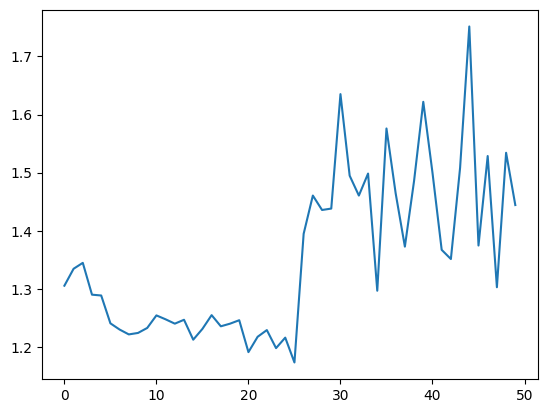

In [43]:
plt.plot(taus_avg[:60])

In [178]:
from analysis.timescales import timescales_utils
reload(timescales_utils)
full_path = './trained_models/SLURM_ARRAY_JOB_ID=7669330_Mar-05-2024-13_14_48/481_grow_parity__2024-Mar-05-13_18_33/rnn_1_N26'
for subdir, N_max_max in paths_sorted[:5]:

    print("Running on: ", subdir)
    full_path = os.path.join("trained_models", "SLURM_ARRAY_JOB_ID=7669330_Mar-05-2024-13_14_48",
                             subdir, f'rnn_1_N{N_max_max}')

    rnn, configs = compute_taus_growing.load_and_hydrate_hierarchical_model(full_path)

    # comp_acs arguments:
    load_kwargs = {'full_path': full_path} 
    save_path = './results/'
    curriculum_type = 'cumulative' # todo: double check
    task = 'parity'
    network_number = subdir.split('_')[0] # todo: double check
    N_max_max = 26
    N_max_range = np.arange(N_max_max, N_max_max+1, 1)
    burn_T = 500 # Burn-in time at the beginning of each simulation to reach stationary state
    T = 10**2 + 500 + burn_T # number of time steps for simulations
    num_neurons = int(configs['NET_SIZE'])
    num_trials = 12 # number of simulated trials
    max_lag = 200 # maximum time lag for saving ACs
    fit_lag = 30  # maximum time-lag for fitting ACs (we choose a small number to avoid AC bias)



    timescales_utils.comp_acs(load_function=compute_taus_growing.load_and_hydrate_hierarchical_model,                       
                              load_func_kwargs=load_kwargs, 
                              save_path=save_path, 
                              curriculum_type=curriculum_type,
                              task=task, 
                              network_number=network_number,
                              N_max_range=N_max_range, 
                              T=T, 
                              num_neurons=num_neurons, 
                              num_trials=num_trials, 
                              max_lag=max_lag, 
                              fit_lag=fit_lag, 
                              burn_T=burn_T)

Running on:  481_grow_parity__2024-Mar-05-13_18_33
N =  26
Computing population AC
Computing single-neuron AC


100%|██████████| 125/125 [00:02<00:00, 49.65it/s]


------------
Running on:  754_grow_parity__2024-Mar-05-13_26_16
N =  26
Computing population AC
Computing single-neuron AC


100%|██████████| 125/125 [00:02<00:00, 46.73it/s]


------------
Running on:  497_grow_parity__2024-Mar-05-13_18_33
N =  26
Computing population AC
Computing single-neuron AC


100%|██████████| 125/125 [00:02<00:00, 47.50it/s]


------------
Running on:  115_grow_parity__2024-Mar-05-13_16_27
N =  26
Computing population AC
Computing single-neuron AC


100%|██████████| 125/125 [00:02<00:00, 53.28it/s]


------------
Running on:  418_grow_parity__2024-Mar-05-13_16_27
N =  26
Computing population AC
Computing single-neuron AC


100%|██████████| 125/125 [00:02<00:00, 53.28it/s]

------------


In [115]:
import pickle
def load_taus_new(path, curriculum_type, task, affixes, network_number, N):
    
    affix_str = '_'
    if len(affixes) > 0:
        affix_str += '_'.join(affixes) + '_'
    
    model_name = os.path.join(
        f'{curriculum_type}_{task}{affix_str}network_{network_number}')
    
    with open(path + model_name +'_N'+str(N) + '_acs_taus.pkl', 'rb') as f:
            data = pickle.load(f)
    tau_eff = data['taus_net']
    selected_models = data['selected_models']
    trained_taus = data['taus_trained']
    single_acs = data['ac_all']
    ac_pop = data['ac_pop']
    
            
#     tau_eff = np.array(tau_eff)
    return tau_eff, selected_models, trained_taus, single_acs, ac_pop 

In [183]:
import pickle
def my_taus_loader(path):
    
    with open(path, 'rb') as f:
            data = pickle.load(f)
    tau_eff = data['taus_net']
    selected_models = data['selected_models']
    trained_taus = data['taus_trained']
    single_acs = data['ac_all']
    ac_pop = data['ac_pop']
    
            
#     tau_eff = np.array(tau_eff)
    return data

In [182]:
results_files

['./results/cumulative_parity_network_115_N26_acs_taus.pkl',
 './results/cumulative_parity_network_497_N26_acs_taus.pkl',
 './results/cumulative_parity_network_481_N26_acs_taus.pkl',
 './results/cumulative_parity_network_418_N26_acs_taus.pkl',
 './results/cumulative_parity_network_754_N26_acs_taus.pkl']

In [195]:
import glob
results_files = glob.glob("./results/cumulative*")
data = {}
for path in results_files:
    with open(path, 'rb') as f:
        d = pickle.load(f)
    data[path] = d

In [197]:
data.keys()

dict_keys(['./results/cumulative_parity_network_115_N26_acs_taus.pkl', './results/cumulative_parity_network_497_N26_acs_taus.pkl', './results/cumulative_parity_network_481_N26_acs_taus.pkl', './results/cumulative_parity_network_418_N26_acs_taus.pkl', './results/cumulative_parity_network_754_N26_acs_taus.pkl'])

In [199]:
N_max_range

array([26])

In [206]:
data['./results/cumulative_parity_network_115_N26_acs_taus.pkl']['taus_trained']

[array([1.5262958, 1.2436583, 1.5845923, 1.0331526, 1.1387169],
       dtype=float32)]

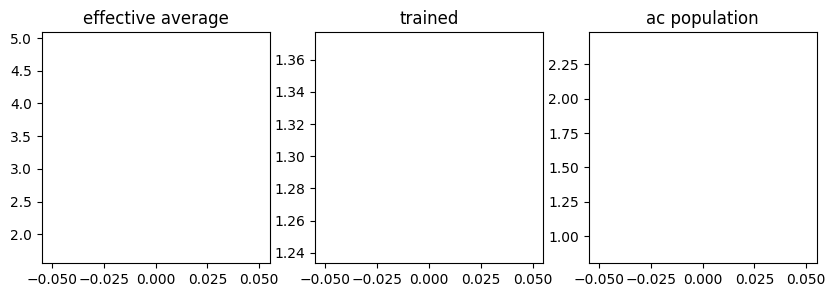

In [208]:
fig, ax = plt.subplots(1,3, figsize=(10, 3))

for p in data.keys():

    tau_eff_avg = np.mean(data[p]['taus_net'])
    tau_trained = np.mean(data[p]['taus_trained'][0])
    ac_pop = [np.mean(data[p]['ac_pop']) for n in N_max_range]


    ax[0].plot(tau_eff_avg)
    ax[0].set_title('effective average')
    ax[1].plot(tau_trained)
    ax[1].set_title('trained')
    ax[2].plot(ac_pop)
    ax[2].set_title('ac population')

In [118]:
data.keys()

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [119]:
tau_eff_avg = [np.mean(data[n][0][:]) for n in N_max_range]
tau_trained = [np.mean(data[n][2][:]) for n in N_max_range]
ac_pop = [np.mean(data[n][-1]) for n in N_max_range]


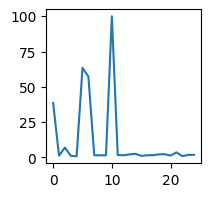

In [144]:
fig, ax = plt.subplots(figsize=(2,2))
ax.plot(data[6][0])


Text(0.5, 1.0, 'ac population')

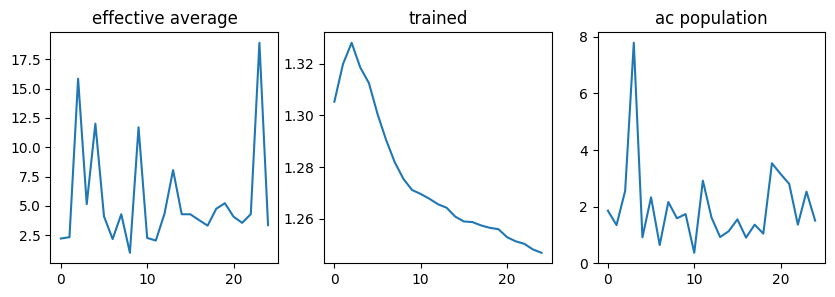

In [146]:
fig, ax = plt.subplots(1,3, figsize=(10, 3))
ax[0].plot(tau_eff_avg)
ax[0].set_title('effective average')
ax[1].plot(tau_trained)
ax[1].set_title('trained')
ax[2].plot(ac_pop)
ax[2].set_title('ac population')

In [172]:
tau_trained = [np.average(data[n][2][n-2]) for n in N_max_range]

# plt.violinplot(tau_trained)

In [173]:
tau_trained

[1.3052832,
 1.3344473,
 1.3446362,
 1.2898352,
 1.2884218,
 1.2404871,
 1.2298027,
 1.221437,
 1.2239478,
 1.2325419,
 1.2541544,
 1.2473999,
 1.2399365,
 1.2466257,
 1.2123339,
 1.2309476,
 1.2546238,
 1.2353863,
 1.2399104,
 1.2458602,
 1.190934,
 1.217357,
 1.2288857,
 1.1978267,
 1.2158728]

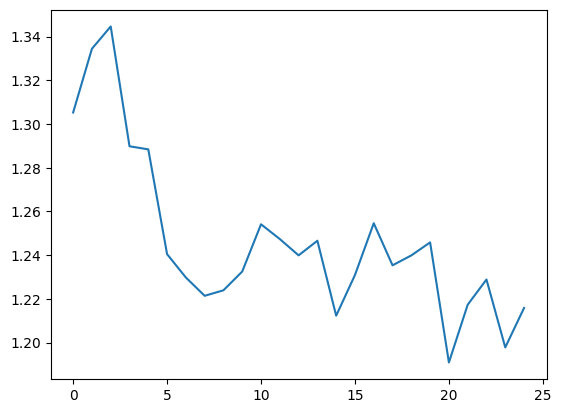

In [174]:
plt.plot(tau_trained)

In [151]:
len(tau_trained)

25

In [152]:
len(tau_trained[0])

1

In [154]:
tau_trained[5]

[array([1.5262958, 1.2436583, 1.5845923, 1.0331526, 1.1387169],
       dtype=float32),
 array([1.2564433, 1.3250833, 1.0901892, 1.3936424, 1.6068783],
       dtype=float32),
 array([1.2095675, 1.3288257, 1.1699516, 1.3811531, 1.6336833],
       dtype=float32),
 array([1.216536 , 1.2832468, 1.115982 , 1.3404069, 1.4930043],
       dtype=float32),
 array([1.2604547, 1.2352588, 1.0425073, 1.4010692, 1.5028185],
       dtype=float32),
 array([1.2339534 , 1.1735107 , 0.94531465, 1.355173  , 1.4944841 ],
       dtype=float32)]

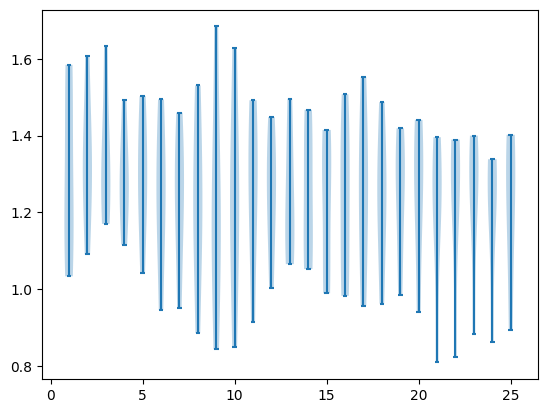

In [161]:
plt.violinplot(tau_trained[24]);

In [162]:
rnn.net_size

[[5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5]]